In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image as pil_image

# Utilities

In [2]:
def img_show(img, title = '', figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.gray()
    plt.title(title)
    plt.show()

In [3]:
def getAffineTransform(pts1, pts2, use_cv2 = True):
    if use_cv2:
        return cv2.getAffineTransform(pts1,pts2)
    
    # we need to solve Ax = b
    # A^(-1)Ax = A^(-1)b
    # x = A^(-1)b
    
    A = np.array(
        [
            [pts1[0][0], pts1[0][1], 0, 0, 1, 0],
            [0, 0, pts1[0][0], pts1[0][1], 0, 1],
            [pts1[1][0], pts1[1][1], 0, 0, 1, 0],
            [0, 0, pts1[1][0], pts1[1][1], 0, 1],
            [pts1[2][0], pts1[2][1], 0, 0, 1, 1],
            [0, 0, pts2[2][0], pts2[2][1], 1, 1],
        ]
    )
    
    b = pts2.flatten()
    x = np.dot(np.linalg.inv(A), b)
    
    return np.array([[x[0], x[1], x[4]], [x[2], x[3], x[5]]])

# Image to be transformed

In [4]:
image = pil_image.open('./view.jpg')
np_img = np.array(image)

# Affine transform example

In [5]:
def affine_tranform(img, use_cv2):
    (width, height) = img.shape[:2]
    pts1 = np.float32([[0,0],[width,0],[0,height]])
    pts2 = np.float32([[50,0],[width,50],[0,height-50]])
    
    print("pts1:\n{}".format(pts1))
    print("pts2:\n{}".format(pts2))
    
    M = getAffineTransform(pts1, pts2, use_cv2=use_cv2)
    dst = cv2.warpAffine(img, M, img.shape[:2])
    img_show(img)
    img_show(dst)

pts1:
[[  0.   0.]
 [600.   0.]
 [  0. 600.]]
pts2:
[[ 50.   0.]
 [600.  50.]
 [  0. 550.]]


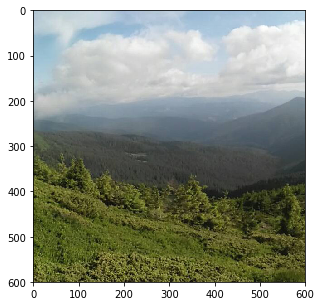

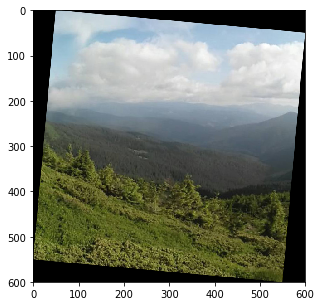

In [6]:
affine_tranform(np_img, True)

# Custom implementation of affine transform

pts1:
[[  0.   0.]
 [600.   0.]
 [  0. 600.]]
pts2:
[[ 50.   0.]
 [600.  50.]
 [  0. 550.]]


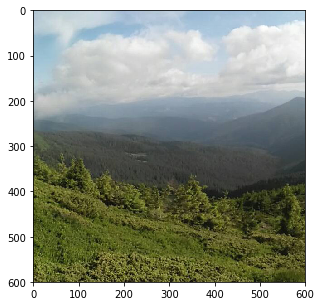

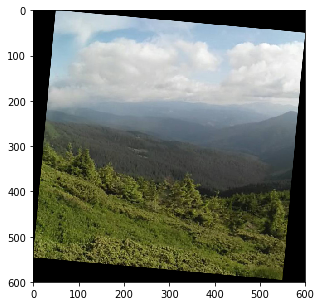

In [7]:
affine_tranform(np_img, False)